In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./data/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15244


### Configurações e Hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './data/'
device_name = 'cuda'
batch_size = 1024
nb_epochs = 10
log_interval = 5
lr = 1e-2
lr_step = 3
num_layers = 1

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size:', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size:', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(5136)
plot_instance(8974)


Train size: 99878 99878
Valid size: 24970 24970

Example:
a zombie
Label: 2 - neutral

Example:
the assumption
Label: 2 - neutral

Example:
hilarious and
Label: 4 - positive

Example:
good cast
Label: 3 - somewhat positive


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers
        )
        self.fc = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc(vector)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino e Validação


* * * Training * * *
Train Epoch:   1 [     0/ 99878 (0%)]	Loss: 1.629458
Train Epoch:   1 [  5120/ 99878 (5%)]	Loss: 1.236684
Train Epoch:   1 [ 10240/ 99878 (10%)]	Loss: 1.221132
Train Epoch:   1 [ 15360/ 99878 (15%)]	Loss: 1.215735
Train Epoch:   1 [ 20480/ 99878 (20%)]	Loss: 1.146330
Train Epoch:   1 [ 25600/ 99878 (26%)]	Loss: 1.173615
Train Epoch:   1 [ 30720/ 99878 (31%)]	Loss: 1.205800
Train Epoch:   1 [ 35840/ 99878 (36%)]	Loss: 1.165489
Train Epoch:   1 [ 40960/ 99878 (41%)]	Loss: 1.079263
Train Epoch:   1 [ 46080/ 99878 (46%)]	Loss: 1.100789
Train Epoch:   1 [ 51200/ 99878 (51%)]	Loss: 1.077090
Train Epoch:   1 [ 56320/ 99878 (56%)]	Loss: 1.047657
Train Epoch:   1 [ 61440/ 99878 (61%)]	Loss: 1.044036
Train Epoch:   1 [ 66560/ 99878 (66%)]	Loss: 0.983281
Train Epoch:   1 [ 71680/ 99878 (71%)]	Loss: 1.021523
Train Epoch:   1 [ 76800/ 99878 (77%)]	Loss: 0.997554
Train Epoch:   1 [ 81920/ 99878 (82%)]	Loss: 0.944758
Train Epoch:   1 [ 87040/ 99878 (87%)]	Loss: 0.917549
Train Ep

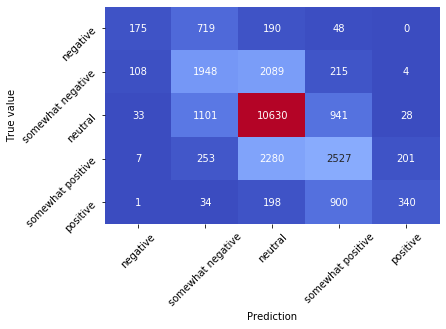


* * * Training * * *
Train Epoch:   2 [     0/ 99878 (0%)]	Loss: 0.855748
Train Epoch:   2 [  5120/ 99878 (5%)]	Loss: 0.863707
Train Epoch:   2 [ 10240/ 99878 (10%)]	Loss: 0.852984
Train Epoch:   2 [ 15360/ 99878 (15%)]	Loss: 0.803650
Train Epoch:   2 [ 20480/ 99878 (20%)]	Loss: 0.756787
Train Epoch:   2 [ 25600/ 99878 (26%)]	Loss: 0.852343
Train Epoch:   2 [ 30720/ 99878 (31%)]	Loss: 0.855316
Train Epoch:   2 [ 35840/ 99878 (36%)]	Loss: 0.818775
Train Epoch:   2 [ 40960/ 99878 (41%)]	Loss: 0.812187
Train Epoch:   2 [ 46080/ 99878 (46%)]	Loss: 0.766739
Train Epoch:   2 [ 51200/ 99878 (51%)]	Loss: 0.866535
Train Epoch:   2 [ 56320/ 99878 (56%)]	Loss: 0.811982
Train Epoch:   2 [ 61440/ 99878 (61%)]	Loss: 0.834134
Train Epoch:   2 [ 66560/ 99878 (66%)]	Loss: 0.839566
Train Epoch:   2 [ 71680/ 99878 (71%)]	Loss: 0.832793
Train Epoch:   2 [ 76800/ 99878 (77%)]	Loss: 0.829841
Train Epoch:   2 [ 81920/ 99878 (82%)]	Loss: 0.772489
Train Epoch:   2 [ 87040/ 99878 (87%)]	Loss: 0.848038
Train Ep

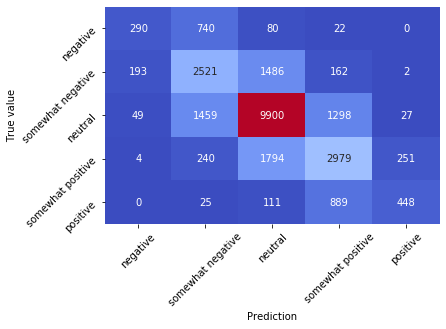


* * * Training * * *
Train Epoch:   3 [     0/ 99878 (0%)]	Loss: 0.724061
Train Epoch:   3 [  5120/ 99878 (5%)]	Loss: 0.664702
Train Epoch:   3 [ 10240/ 99878 (10%)]	Loss: 0.708318
Train Epoch:   3 [ 15360/ 99878 (15%)]	Loss: 0.652687
Train Epoch:   3 [ 20480/ 99878 (20%)]	Loss: 0.750420
Train Epoch:   3 [ 25600/ 99878 (26%)]	Loss: 0.747263
Train Epoch:   3 [ 30720/ 99878 (31%)]	Loss: 0.725879
Train Epoch:   3 [ 35840/ 99878 (36%)]	Loss: 0.729971
Train Epoch:   3 [ 40960/ 99878 (41%)]	Loss: 0.687760
Train Epoch:   3 [ 46080/ 99878 (46%)]	Loss: 0.741587
Train Epoch:   3 [ 51200/ 99878 (51%)]	Loss: 0.763912
Train Epoch:   3 [ 56320/ 99878 (56%)]	Loss: 0.764202
Train Epoch:   3 [ 61440/ 99878 (61%)]	Loss: 0.744749
Train Epoch:   3 [ 66560/ 99878 (66%)]	Loss: 0.753170
Train Epoch:   3 [ 71680/ 99878 (71%)]	Loss: 0.746879
Train Epoch:   3 [ 76800/ 99878 (77%)]	Loss: 0.768556
Train Epoch:   3 [ 81920/ 99878 (82%)]	Loss: 0.721947
Train Epoch:   3 [ 87040/ 99878 (87%)]	Loss: 0.787232
Train Ep

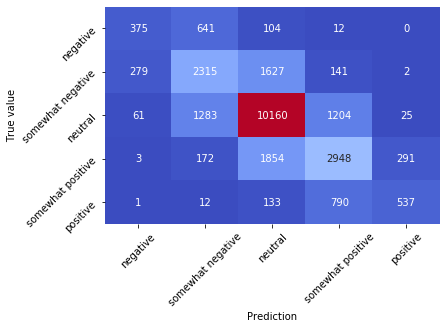


* * * Training * * *
Train Epoch:   4 [     0/ 99878 (0%)]	Loss: 0.621801
Train Epoch:   4 [  5120/ 99878 (5%)]	Loss: 0.638394
Train Epoch:   4 [ 10240/ 99878 (10%)]	Loss: 0.620884
Train Epoch:   4 [ 15360/ 99878 (15%)]	Loss: 0.641031
Train Epoch:   4 [ 20480/ 99878 (20%)]	Loss: 0.625249
Train Epoch:   4 [ 25600/ 99878 (26%)]	Loss: 0.618021
Train Epoch:   4 [ 30720/ 99878 (31%)]	Loss: 0.631168
Train Epoch:   4 [ 35840/ 99878 (36%)]	Loss: 0.612549
Train Epoch:   4 [ 40960/ 99878 (41%)]	Loss: 0.601213
Train Epoch:   4 [ 46080/ 99878 (46%)]	Loss: 0.610367
Train Epoch:   4 [ 51200/ 99878 (51%)]	Loss: 0.578457
Train Epoch:   4 [ 56320/ 99878 (56%)]	Loss: 0.643594
Train Epoch:   4 [ 61440/ 99878 (61%)]	Loss: 0.619639
Train Epoch:   4 [ 66560/ 99878 (66%)]	Loss: 0.646264
Train Epoch:   4 [ 71680/ 99878 (71%)]	Loss: 0.603066
Train Epoch:   4 [ 76800/ 99878 (77%)]	Loss: 0.608676
Train Epoch:   4 [ 81920/ 99878 (82%)]	Loss: 0.605673
Train Epoch:   4 [ 87040/ 99878 (87%)]	Loss: 0.611708
Train Ep

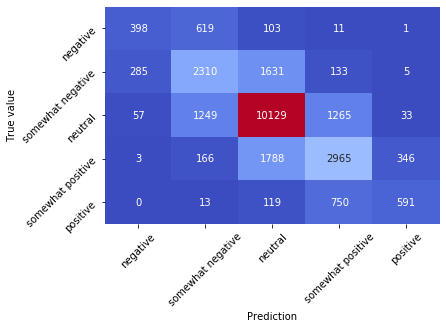


* * * Training * * *
Train Epoch:   5 [     0/ 99878 (0%)]	Loss: 0.572293
Train Epoch:   5 [  5120/ 99878 (5%)]	Loss: 0.596272
Train Epoch:   5 [ 10240/ 99878 (10%)]	Loss: 0.624521
Train Epoch:   5 [ 15360/ 99878 (15%)]	Loss: 0.604550
Train Epoch:   5 [ 20480/ 99878 (20%)]	Loss: 0.616721
Train Epoch:   5 [ 25600/ 99878 (26%)]	Loss: 0.631834
Train Epoch:   5 [ 30720/ 99878 (31%)]	Loss: 0.609193
Train Epoch:   5 [ 35840/ 99878 (36%)]	Loss: 0.612248
Train Epoch:   5 [ 40960/ 99878 (41%)]	Loss: 0.587301
Train Epoch:   5 [ 46080/ 99878 (46%)]	Loss: 0.604868
Train Epoch:   5 [ 51200/ 99878 (51%)]	Loss: 0.622642
Train Epoch:   5 [ 56320/ 99878 (56%)]	Loss: 0.628566
Train Epoch:   5 [ 61440/ 99878 (61%)]	Loss: 0.599958
Train Epoch:   5 [ 66560/ 99878 (66%)]	Loss: 0.642928
Train Epoch:   5 [ 71680/ 99878 (71%)]	Loss: 0.587936
Train Epoch:   5 [ 76800/ 99878 (77%)]	Loss: 0.582595
Train Epoch:   5 [ 81920/ 99878 (82%)]	Loss: 0.572003
Train Epoch:   5 [ 87040/ 99878 (87%)]	Loss: 0.595967
Train Ep

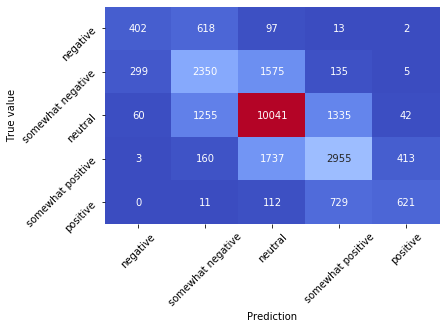


* * * Training * * *
Train Epoch:   6 [     0/ 99878 (0%)]	Loss: 0.596865
Train Epoch:   6 [  5120/ 99878 (5%)]	Loss: 0.527303
Train Epoch:   6 [ 10240/ 99878 (10%)]	Loss: 0.580619
Train Epoch:   6 [ 15360/ 99878 (15%)]	Loss: 0.562154
Train Epoch:   6 [ 20480/ 99878 (20%)]	Loss: 0.602869
Train Epoch:   6 [ 25600/ 99878 (26%)]	Loss: 0.564618
Train Epoch:   6 [ 30720/ 99878 (31%)]	Loss: 0.568340
Train Epoch:   6 [ 35840/ 99878 (36%)]	Loss: 0.590303
Train Epoch:   6 [ 40960/ 99878 (41%)]	Loss: 0.625256
Train Epoch:   6 [ 46080/ 99878 (46%)]	Loss: 0.592470
Train Epoch:   6 [ 51200/ 99878 (51%)]	Loss: 0.592560
Train Epoch:   6 [ 56320/ 99878 (56%)]	Loss: 0.570904
Train Epoch:   6 [ 61440/ 99878 (61%)]	Loss: 0.588317
Train Epoch:   6 [ 66560/ 99878 (66%)]	Loss: 0.653685
Train Epoch:   6 [ 71680/ 99878 (71%)]	Loss: 0.579676
Train Epoch:   6 [ 76800/ 99878 (77%)]	Loss: 0.604958
Train Epoch:   6 [ 81920/ 99878 (82%)]	Loss: 0.595682
Train Epoch:   6 [ 87040/ 99878 (87%)]	Loss: 0.598322
Train Ep

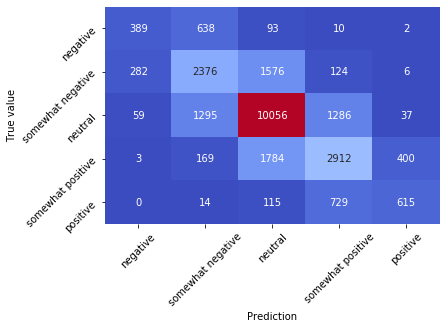


* * * Training * * *
Train Epoch:   7 [     0/ 99878 (0%)]	Loss: 0.562488
Train Epoch:   7 [  5120/ 99878 (5%)]	Loss: 0.597718
Train Epoch:   7 [ 10240/ 99878 (10%)]	Loss: 0.597122
Train Epoch:   7 [ 15360/ 99878 (15%)]	Loss: 0.589921
Train Epoch:   7 [ 20480/ 99878 (20%)]	Loss: 0.566987
Train Epoch:   7 [ 25600/ 99878 (26%)]	Loss: 0.585576
Train Epoch:   7 [ 30720/ 99878 (31%)]	Loss: 0.567021
Train Epoch:   7 [ 35840/ 99878 (36%)]	Loss: 0.598848
Train Epoch:   7 [ 40960/ 99878 (41%)]	Loss: 0.562693
Train Epoch:   7 [ 46080/ 99878 (46%)]	Loss: 0.561798
Train Epoch:   7 [ 51200/ 99878 (51%)]	Loss: 0.571825
Train Epoch:   7 [ 56320/ 99878 (56%)]	Loss: 0.607910
Train Epoch:   7 [ 61440/ 99878 (61%)]	Loss: 0.565569
Train Epoch:   7 [ 66560/ 99878 (66%)]	Loss: 0.592175
Train Epoch:   7 [ 71680/ 99878 (71%)]	Loss: 0.567011
Train Epoch:   7 [ 76800/ 99878 (77%)]	Loss: 0.562367
Train Epoch:   7 [ 81920/ 99878 (82%)]	Loss: 0.518495
Train Epoch:   7 [ 87040/ 99878 (87%)]	Loss: 0.553302
Train Ep

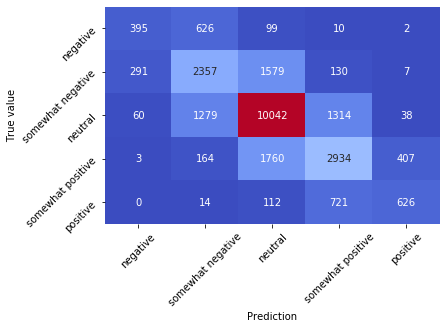


* * * Training * * *
Train Epoch:   8 [     0/ 99878 (0%)]	Loss: 0.567502
Train Epoch:   8 [  5120/ 99878 (5%)]	Loss: 0.591533
Train Epoch:   8 [ 10240/ 99878 (10%)]	Loss: 0.575856
Train Epoch:   8 [ 15360/ 99878 (15%)]	Loss: 0.536655
Train Epoch:   8 [ 20480/ 99878 (20%)]	Loss: 0.575770
Train Epoch:   8 [ 25600/ 99878 (26%)]	Loss: 0.587233
Train Epoch:   8 [ 30720/ 99878 (31%)]	Loss: 0.584630
Train Epoch:   8 [ 35840/ 99878 (36%)]	Loss: 0.591701
Train Epoch:   8 [ 40960/ 99878 (41%)]	Loss: 0.583043
Train Epoch:   8 [ 46080/ 99878 (46%)]	Loss: 0.550146
Train Epoch:   8 [ 51200/ 99878 (51%)]	Loss: 0.589926
Train Epoch:   8 [ 56320/ 99878 (56%)]	Loss: 0.561778
Train Epoch:   8 [ 61440/ 99878 (61%)]	Loss: 0.533226
Train Epoch:   8 [ 66560/ 99878 (66%)]	Loss: 0.549800
Train Epoch:   8 [ 71680/ 99878 (71%)]	Loss: 0.523500
Train Epoch:   8 [ 76800/ 99878 (77%)]	Loss: 0.541685
Train Epoch:   8 [ 81920/ 99878 (82%)]	Loss: 0.548200
Train Epoch:   8 [ 87040/ 99878 (87%)]	Loss: 0.543608
Train Ep

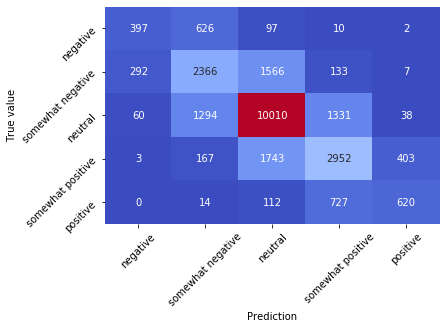


* * * Training * * *
Train Epoch:   9 [     0/ 99878 (0%)]	Loss: 0.583681
Train Epoch:   9 [  5120/ 99878 (5%)]	Loss: 0.599714
Train Epoch:   9 [ 10240/ 99878 (10%)]	Loss: 0.576660
Train Epoch:   9 [ 15360/ 99878 (15%)]	Loss: 0.570747
Train Epoch:   9 [ 20480/ 99878 (20%)]	Loss: 0.579884
Train Epoch:   9 [ 25600/ 99878 (26%)]	Loss: 0.570162
Train Epoch:   9 [ 30720/ 99878 (31%)]	Loss: 0.558604
Train Epoch:   9 [ 35840/ 99878 (36%)]	Loss: 0.549585
Train Epoch:   9 [ 40960/ 99878 (41%)]	Loss: 0.573972
Train Epoch:   9 [ 46080/ 99878 (46%)]	Loss: 0.565296
Train Epoch:   9 [ 51200/ 99878 (51%)]	Loss: 0.558668
Train Epoch:   9 [ 56320/ 99878 (56%)]	Loss: 0.571286
Train Epoch:   9 [ 61440/ 99878 (61%)]	Loss: 0.550371
Train Epoch:   9 [ 66560/ 99878 (66%)]	Loss: 0.606147
Train Epoch:   9 [ 71680/ 99878 (71%)]	Loss: 0.568091
Train Epoch:   9 [ 76800/ 99878 (77%)]	Loss: 0.561944
Train Epoch:   9 [ 81920/ 99878 (82%)]	Loss: 0.535213
Train Epoch:   9 [ 87040/ 99878 (87%)]	Loss: 0.558183
Train Ep

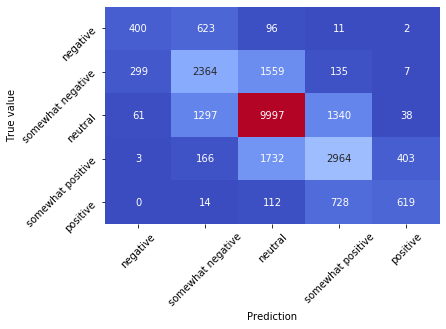


* * * Training * * *
Train Epoch:  10 [     0/ 99878 (0%)]	Loss: 0.548639
Train Epoch:  10 [  5120/ 99878 (5%)]	Loss: 0.563891
Train Epoch:  10 [ 10240/ 99878 (10%)]	Loss: 0.524297
Train Epoch:  10 [ 15360/ 99878 (15%)]	Loss: 0.527045
Train Epoch:  10 [ 20480/ 99878 (20%)]	Loss: 0.599558
Train Epoch:  10 [ 25600/ 99878 (26%)]	Loss: 0.597514
Train Epoch:  10 [ 30720/ 99878 (31%)]	Loss: 0.546419
Train Epoch:  10 [ 35840/ 99878 (36%)]	Loss: 0.547514
Train Epoch:  10 [ 40960/ 99878 (41%)]	Loss: 0.571886
Train Epoch:  10 [ 46080/ 99878 (46%)]	Loss: 0.569227
Train Epoch:  10 [ 51200/ 99878 (51%)]	Loss: 0.570510
Train Epoch:  10 [ 56320/ 99878 (56%)]	Loss: 0.570058
Train Epoch:  10 [ 61440/ 99878 (61%)]	Loss: 0.569322
Train Epoch:  10 [ 66560/ 99878 (66%)]	Loss: 0.591999
Train Epoch:  10 [ 71680/ 99878 (71%)]	Loss: 0.570478
Train Epoch:  10 [ 76800/ 99878 (77%)]	Loss: 0.613289
Train Epoch:  10 [ 81920/ 99878 (82%)]	Loss: 0.554475
Train Epoch:  10 [ 87040/ 99878 (87%)]	Loss: 0.553298
Train Ep

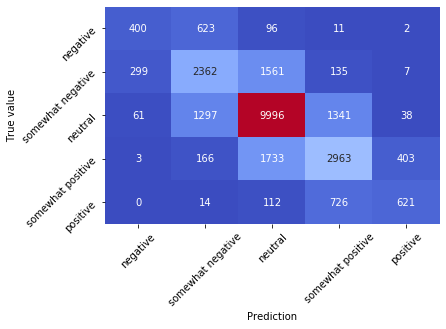

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 65.65%


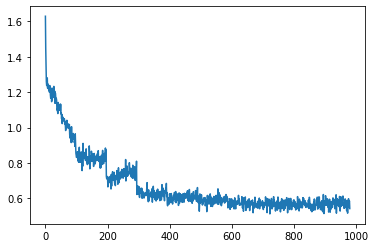

In [14]:
plt.plot(history['train_loss'])
plt.show()

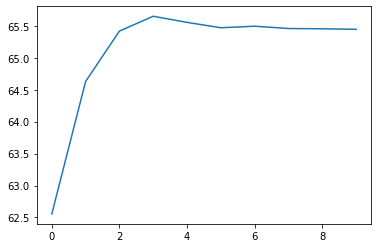

In [15]:
plt.plot(history['val_acc'])
plt.show()